In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('data.csv')#.dropna()

In [72]:
for column in df.columns[2:]:
    df.loc[:, column] = pd.to_numeric(df[column], errors='coerce')

In [73]:
df.dropna(inplace=True)

In [74]:
df.columns

Index(['Region Code', 'Local Authority',
       'Pupils whose first language is English(8)',
       'Pupils whose first language is other than English(9)',
       'All pupils(10)', 'Pupils known to be eligible for free school meals',
       'All other pupils(8)', 'All pupils', 'Disadvantaged pupils(1)',
       'All other pupils(9)', 'All pupils.1', 'Pupils with no identified SEN',
       'SEN support', 'SEN with a statement or EHC plan', 'All pupils(9)',
       'Number of pupils at the end of key stage 4',
       'Average Attainment 8 score per pupil3',
       'Percentage of pupils entered for components',
       'Percentage of pupils who achieved a strong 9-5 pass5',
       'Percentage of pupils who achieved a standard 9-4 pass 5',
       'Overall absence', 'Percentage of persistent absentees'],
      dtype='object')

In [132]:
df['region_code'] = df['Region Code']
df['local'] = df['Local Authority']
df['non_english'] = df['Pupils whose first language is other than English(9)']/df['All pupils(10)']
df['meals'] = df['Pupils known to be eligible for free school meals']/df['All pupils']
df['disadvantaged'] = df['Disadvantaged pupils(1)']/df['All pupils.1']
df['sen'] = df['SEN support']/df['All pupils(9)']
df['absence'] = df['Overall absence']/100.
df['persistent_absence'] = df['Percentage of persistent absentees']/100.
df['pass'] = df['Percentage of pupils who achieved a standard 9-4 pass 5']

In [133]:
new_df = df[['pass', 'region_code', 'local', 'non_english', 'meals', 'disadvantaged', 'sen', 'absence', 'persistent_absence']]

In [134]:
new_df

,pass,region_code,local,non_english,meals,disadvantaged,sen,absence,persistent_absence
0,59.1,E92000001,England9,0.154340,0.131369,0.272517,0.103983,0.046,0.105
2,59.9,E12000001,North East,0.051634,0.171784,0.324781,0.102951,0.047,0.112
3,58.2,E06000047,County Durham,0.016710,0.167969,0.330729,0.085720,0.049,0.125
4,63.1,E06000005,Darlington,0.053471,0.164165,0.325516,0.137899,0.047,0.110
5,62.4,E08000037,Gateshead,0.042431,0.149817,0.296490,0.075432,0.044,0.100
6,59.5,E06000001,Hartlepool,0.035861,0.189549,0.387295,0.087090,0.049,0.118
7,58.4,E06000002,Middlesbrough,0.155123,0.244589,0.435065,0.149351,0.055,0.151
8,56.4,E08000021,Newcastle upon Tyne,0.163844,0.232430,0.387807,0.113040,0.047,0.119
9,65.0,E08000022,North Tyneside,0.042879,0.118938,0.261868,0.068402,0.043,0.097
10,60.8,E06000057,Northumberland,0.013990,0.114785,0.238156,0.081081,0.046,0.102


In [279]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge

In [280]:
from sklearn.tree import DecisionTreeRegressor

In [289]:
X = new_df[['non_english', 'disadvantaged', 'sen', 'absence', 'meals', 'persistent_absence']]
y = new_df['pass']
#model = DecisionTreeRegressor()
model = Lasso(alpha=0.1)

In [290]:
model.fit(X[:-10], y[:-10])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [291]:
model.coef_

array([ 13.81221269, -26.82716168,  -0.        ,  -0.        ,
        -0.        ,  -0.        ])

In [292]:
model.intercept_

69.36631654173584

In [293]:
def predict(non_english, disadvantaged):
    return 69.366 + 13.812 * non_english - 26.827 * disadvantaged

In [294]:
pred = model.predict(X[-10:])

In [295]:
true = y[-10:]

In [296]:
np.square(pred - true).mean()

7.741025507580401

In [219]:
np.square(65 - true).mean()

10.828000000000008

In [112]:
import statsmodels.api as sm

In [155]:

X = new_df[['disadvantaged']]
y = new_df['pass']

model  = sm.OLS(y, X).fit()

In [156]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pass   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     917.0
Date:                Sat, 30 Jun 2018   Prob (F-statistic):           1.91e-67
Time:                        20:57:31   Log-Likelihood:                -729.67
No. Observations:                 158   AIC:                             1461.
Df Residuals:                     157   BIC:                             1464.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
disadvantaged   187.2822      6.184     30.283      0.000     175.067     199.498
==============================================================================
Omnibus:                        8.169   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.613
Skew:                          -0.567   Prob(JB):                       0.0135
Kurtosis:                       2.845   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

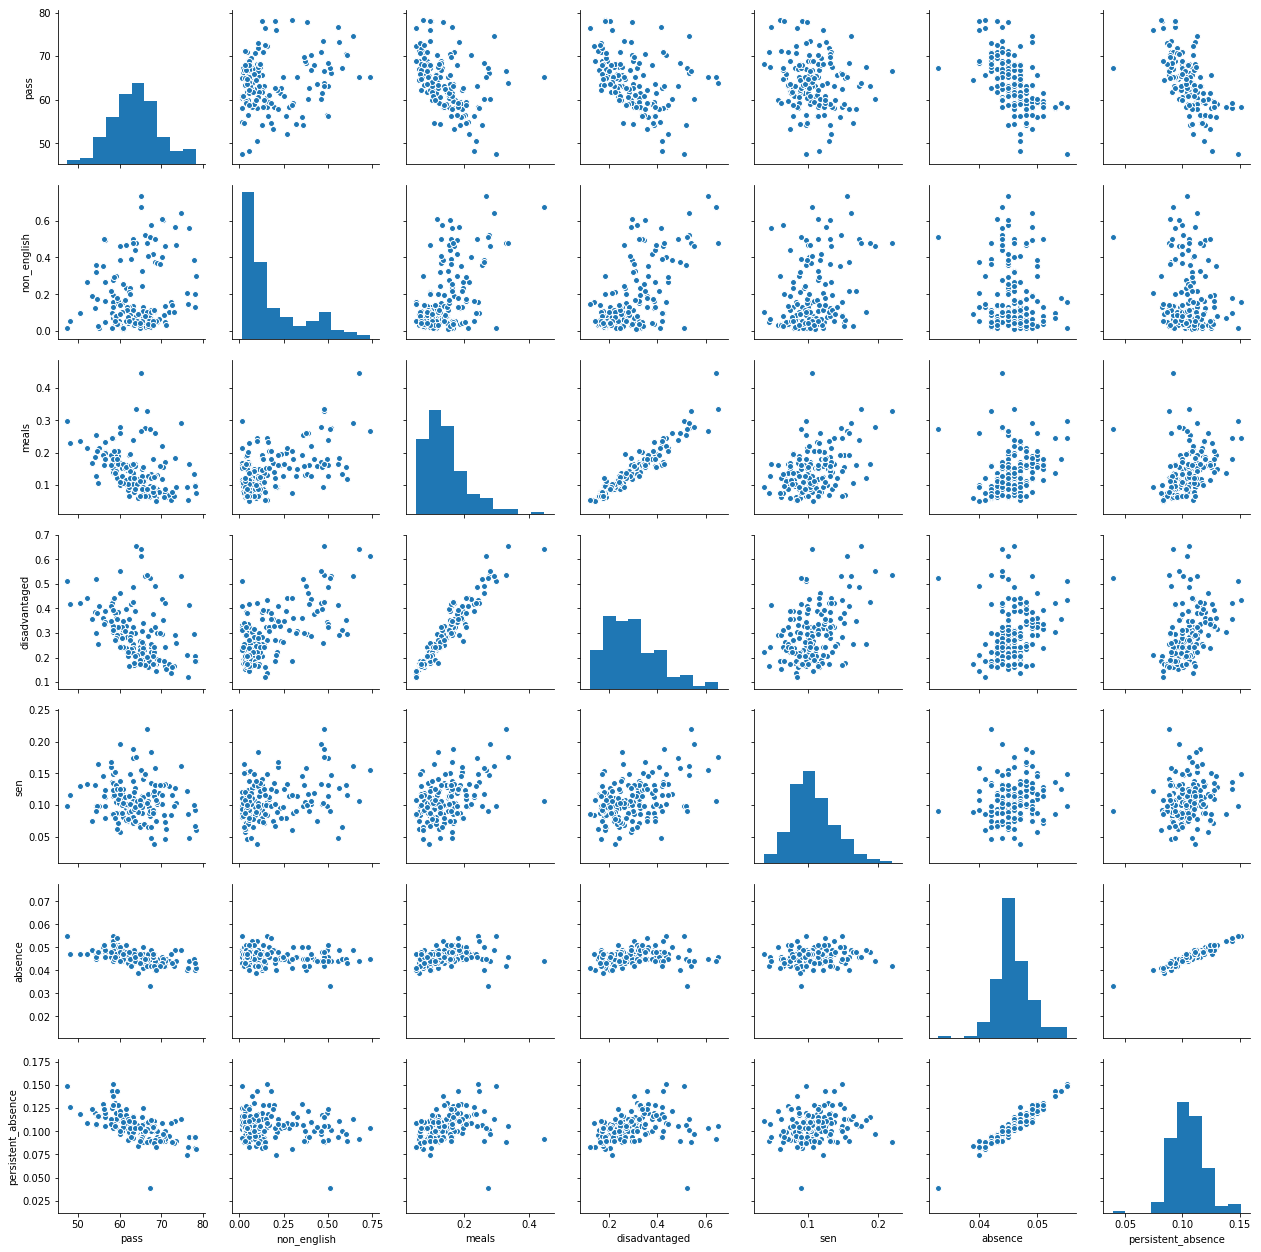

In [147]:
import seaborn as sns
sns.pairplot(new_df)

In [187]:
new_df.to_csv('processed.csv')